<a href="https://colab.research.google.com/github/12singhshiva/1RF21IS051/blob/main/walmart_DTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Walmart_sales.csv')  # Replace 'walmart_dataset.csv' with your file path

# Check for missing values and handle them if necessary
# For example, you can drop rows with missing values:
df.dropna(inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the first few rows of the dataframe
print(df.head())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


<ipython-input-2-483c0f197a91>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


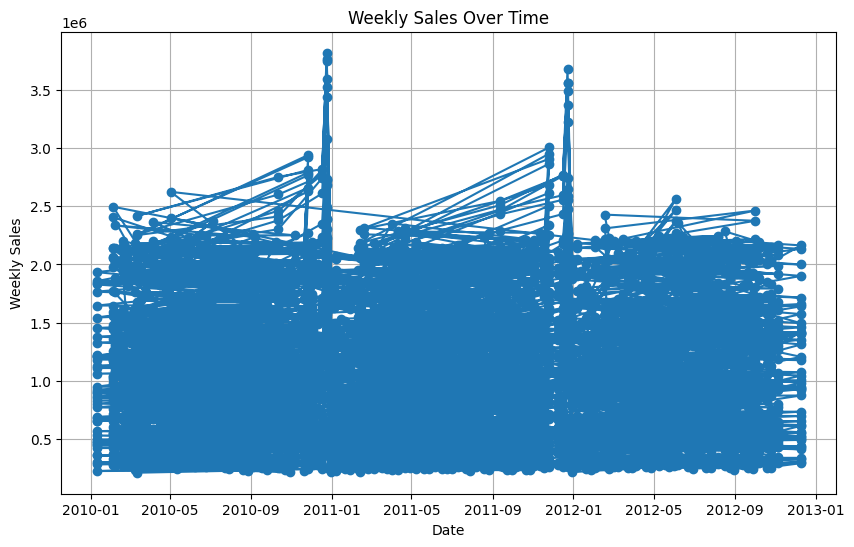

<ipython-input-4-ab7f6c832bd6>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


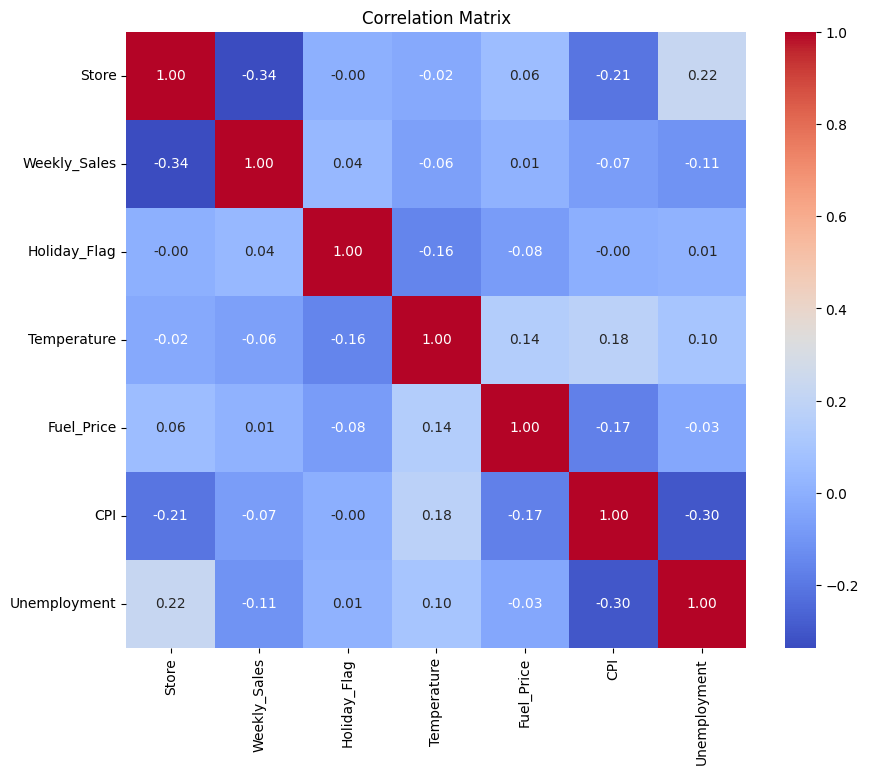

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot weekly sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [8]:
df.dropna(inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Split the data into features and target variable
X = df.drop(columns=['Weekly_Sales', 'Date'])  # Features
y = df['Weekly_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Root Mean Square (RMS) Value
# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Construct a Decision Tree using the best parameters
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}
Root Mean Squared Error: 161335.57523911924


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [9]:
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [10]:
accuracy = best_tree.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.917645487747455
